In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df = pd.read_csv('eda_data.csv')
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python,R,spark_yn,AWS,excel_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,50,1,0,0,0,1,data scientist,na,2555,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,39,1,0,0,0,0,data scientist,na,4828,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,13,1,0,1,0,1,data scientist,na,3495,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,58,1,0,0,0,0,data scientist,na,3926,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,25,1,0,0,0,1,data scientist,na,2748,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\r\n...,3.9,GSK\r\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,...,193,0,0,0,1,0,na,senior,6219,3
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite\r\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,...,17,1,0,1,1,0,data engineer,senior,6167,3
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\r\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,...,39,0,0,0,0,1,na,na,3107,0
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC\r\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,...,-1,0,0,0,0,1,manager,na,1678,0


In [3]:
# choose relevant columns 
df.columns

df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python','spark_yn','AWS','excel_yn','job_simp','seniority','desc_len']]

In [4]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [5]:
# train test split 
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
import statsmodels.api as sm
# Convert boolean columns to binary integers (0 and 1)
bool_columns = ['job_simp_analyst', 'job_simp_data engineer', 'job_simp_data scientist',
                'job_simp_director', 'job_simp_manager', 'job_simp_mle', 'job_simp_na',
                'seniority_jr', 'seniority_na', 'seniority_senior']

X_train[bool_columns] = X_train[bool_columns].astype(int)

# Now fit the regression model
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.35
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           3.07e-95
Time:                        10:54:10   Log-Likelihood:                -3312.7
No. Observations:                 742   AIC:                             6907.
Df Residuals:                     601   BIC:                             7557.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [7]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.67054618746022

,alpha,error
11,0.12,-19.260783


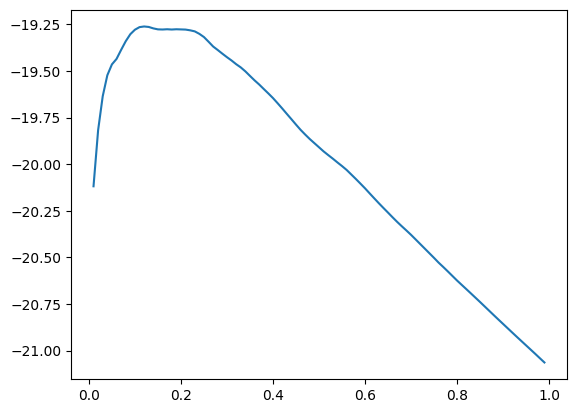

In [8]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [9]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-15.200061486267069

In [10]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': range(10, 300, 10),
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

C:\Users\Goerge\anaconda3\envs\Final_Project\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
348 fits failed out of a total of 1044.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
348 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Goerge\anaconda3\envs\Final_Project\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Goerge\anaconda3\envs\Final_Project\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Goerge\anaconda3\envs\Final_Project\lib\site-packages\sklearn\base.py", line 637, in _validate_params
   

RandomForestRegressor(criterion='poisson', max_features='sqrt', n_estimators=60)

In [11]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)


from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)


12.142170022371365

# Predict salary cahnge in next 5 years

In [12]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "gs.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(gs, file)

In [13]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# evaluate model 
y_predict = model.predict(X_test)
y_predict

# check results
#print(classification_report(y_test, y_predict))

array([118.70833333,  52.3       , 154.1       , 124.83333333,
       150.66666667, 109.01666667, 146.3       ,  59.34166667,
        69.575     ,  77.71666667, 142.31666667,  67.39166667,
       103.575     , 116.43333333,  84.95833333, 138.18333333,
        82.00833333,  73.10833333,  98.325     ,  92.625     ,
       106.65      , 144.30833333, 150.075     , 112.50833333,
       131.36666667, 104.74166667,  72.325     , 135.45833333,
       106.64166667, 101.86666667,  86.24166667,  54.46666667,
       121.56666667, 105.24166667, 105.73333333,  87.7       ,
        88.11666667, 114.76666667,  66.93333333, 117.6       ,
       198.875     , 123.175     ,  90.43333333,  78.23333333,
       145.225     ,  83.50833333, 139.68333333, 108.425     ,
       129.66666667, 102.40833333,  90.425     ,  82.36666667,
        76.575     , 107.43333333,  93.38333333, 111.08333333,
        90.43333333,  68.875     , 248.11666667, 118.1       ,
       118.06666667,  94.24166667, 105.75      , 134.45

# Test / Experiment

In [14]:
X_test_example1 = X_test
X_test_example1

,Rating,num_comp,hourly,employer_provided,same_state,age,python,spark_yn,AWS,excel_yn,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
120,4.4,0,0,0,1,24,1,0,0,1,...,False,False,True,False,False,False,False,False,True,False
196,3.6,0,0,0,1,37,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
336,3.5,3,0,0,1,13,1,0,0,1,...,False,False,False,False,False,False,True,False,False,True
582,3.9,0,0,0,1,11,1,0,1,0,...,False,False,True,False,False,False,False,False,False,True
395,4.0,2,0,0,0,16,1,1,1,1,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,4.0,0,0,0,0,84,0,0,0,0,...,False,False,False,False,False,False,True,False,True,False
223,3.7,3,0,0,0,242,0,0,0,1,...,False,False,False,False,False,False,True,False,True,False
131,3.2,3,0,0,1,65,1,0,0,1,...,False,False,True,False,False,False,False,False,True,False
44,4.3,3,0,0,1,30,1,1,0,1,...,False,False,True,False,False,False,False,False,False,True


In [22]:
# Predict data science salary in the next 5 years
X_test_example1['age'] = X_test_example1['age'] + 5
X_test_example1['job_simp_data scientist'] = True
X_test_example1

,Rating,num_comp,hourly,employer_provided,same_state,age,python,spark_yn,AWS,excel_yn,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
120,4.4,0,0,0,1,34,1,0,0,1,...,False,False,True,False,False,False,False,False,True,False
196,3.6,0,0,0,1,47,0,0,0,1,...,True,False,True,False,False,False,False,False,True,False
336,3.5,3,0,0,1,23,1,0,0,1,...,False,False,True,False,False,False,True,False,False,True
582,3.9,0,0,0,1,21,1,0,1,0,...,False,False,True,False,False,False,False,False,False,True
395,4.0,2,0,0,0,26,1,1,1,1,...,False,True,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,4.0,0,0,0,0,94,0,0,0,0,...,False,False,True,False,False,False,True,False,True,False
223,3.7,3,0,0,0,252,0,0,0,1,...,False,False,True,False,False,False,True,False,True,False
131,3.2,3,0,0,1,75,1,0,0,1,...,False,False,True,False,False,False,False,False,True,False
44,4.3,3,0,0,1,40,1,1,0,1,...,False,False,True,False,False,False,False,False,False,True


In [23]:
#Predicted values
model.predict(X_test_example1)

array([118.6       ,  72.31666667, 140.98333333, 120.725     ,
       146.84166667, 108.75      , 128.91666667,  67.86666667,
        79.10833333,  95.34166667, 138.24166667,  77.39166667,
       112.86666667, 120.375     ,  92.30833333, 137.46666667,
        82.98333333,  90.775     ,  98.575     ,  92.2       ,
       112.325     , 129.85      , 148.        , 112.54166667,
       145.94166667, 110.2       ,  94.09166667, 135.45833333,
        97.78333333,  96.48333333,  99.06666667,  72.60833333,
       131.45833333, 105.30833333,  99.85      ,  88.59166667,
        94.06666667, 112.575     ,  88.25833333, 116.975     ,
       178.50833333, 127.2       , 104.85      , 108.125     ,
       145.225     ,  84.80833333, 138.93333333, 105.51666667,
       131.05      , 102.        ,  90.90833333,  94.18333333,
        99.93333333,  90.98333333,  96.79166667, 109.175     ,
       104.85      ,  90.525     , 206.95833333, 121.95      ,
       118.65      , 104.30833333, 112.6       , 134.45

In [24]:
#Actual values
y_test

array([100.5,  48.5, 154.5, 122. , 162. , 107. , 150.5,  44.5,  59.5,
        51.5, 161.5,  61. , 102.5, 120. , 106.5, 140. ,  56.5,  61.5,
        85.5, 106. ,  74. , 154.5, 150.5, 110.5,  98.5, 109. ,  61. ,
       146.5, 107. ,  95. ,  87.5,  52.5, 133. ,  76.5, 110. ,  79.5,
        90. , 120. ,  62.5, 121. , 194.5, 122.5,  80. ,  74. , 169. ,
        69.5, 137. , 163.5, 128.5, 118. , 119.5,  68.5,  73. ,  99. ,
        82. , 109.5,  80. ,  66.5, 254. , 100. , 125. , 168. , 177. ,
       133.5, 107. , 107.5, 143.5, 139.5, 153. , 109.5, 169. , 139.5,
        76. , 100.5,  26.5, 107. ,  67. ,  74.5,  96. ,  81. , 138.5,
        94.5, 147. , 157. ,  86. , 134.5,  84. ,  20.5,  84.5,  52.5,
       116.5, 145. ,  81. ,  48.5, 139. , 106.5,  85. ,  54. ,  90.5,
        76.5,  95.5, 113. , 138.5, 111.5,  71.5, 124. , 167.5,  90. ,
        60. , 232.5,  66.5, 109. ,  87. , 113.5,  51. ,  87. ,  54. ,
        76. ,  96. ,  81. ,  51.5,  84.5,  82. ,  93. ,  70. , 225. ,
        75.5,  84. ,

In [30]:
import pandas as pd

# Predicted values
y_predicted = model.predict(X_test_example1)

# Create a DataFrame
data = {
    'Predicted': y_predicted,
    'Actual': y_test
}
df = pd.DataFrame(data)

# Save DataFrame to a CSV file
#csv_filename = 'DS_predictions_v_actual.csv'
df.to_csv('output/DS_predictions_v_actual.csv', index=False)

print(f'CSV file "{csv_filename}" has been created with predictions.')


CSV file "DS_predictions_v_actual.csv" has been created with predictions.


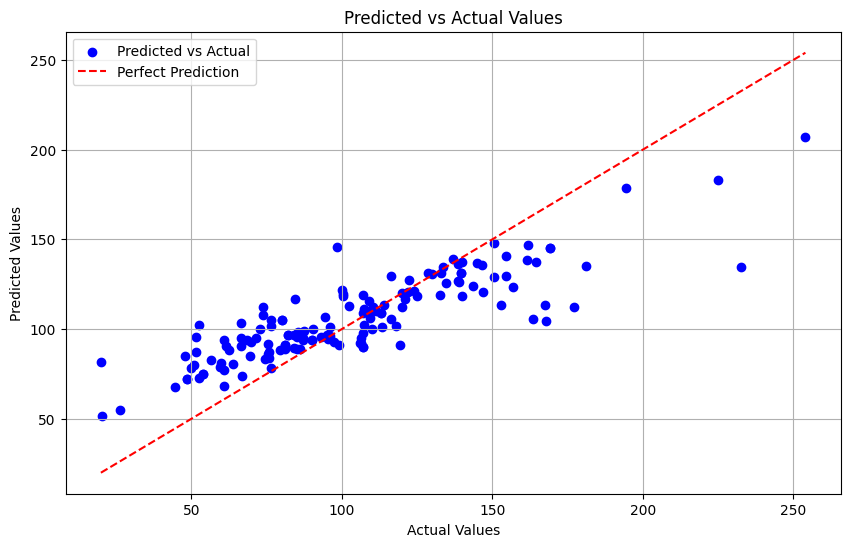

In [31]:
import matplotlib.pyplot as plt

# Predicted values
y_predicted = model.predict(X_test_example1)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

# Customize the plot
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Show the plot
plt.show()